# Official Detail of Student

**Name : Kirankumar Chaudhary**

**Student ID : 2120051**

**Email ID : k.chaudhary@rgu.ac.uk**

# Part One

## Dataset Information 

In this project, I curated a dataset of medical X-ray images from three different body sections: Chest, Hand, and Shoulder. 

The dataset was compiled by downloading and combining images from three publicly available sources on Kaggle. 

The Chest class includes 2,167 images, sourced from the "Coronahack Chest X-ray Dataset" (https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset). 

The Hand class consists of 1,645 images, obtained from the "Hand X-ray" dataset (https://www.kaggle.com/antonbudnychuk/hand-xray). 

Lastly, the Shoulder class comprises 945 images, which were gathered from the "Shoulder X-ray Classification" dataset (https://www.kaggle.com/dryari5/shoulder-xray-classification).


I have organized dataset by storing the images of each class under a separate subfolder within the 'Data' folder. This structure makes it easy to read and process the images while keeping them organized by their respective class labels (Chest, Hand, and Shoulder).

## Importing and preprocessing images in DataFrame

In [44]:
import os
import numpy as np
import cv2
import pandas as pd

In [45]:
resize_width = 25
resize_height = 25
path = 'data/'
images = [] # List to append the images as 2D numpy arrays
target =  []
originalrepo = [] # Create a repo for flattened pixels

for root, dirs, files in os.walk(path):
    for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height)) 
                images.append(img)
                # Append the flattened image to the pixel repo
                originalrepo.append(img.flatten())
                # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))

            except Exception as e:
                print("Invalid file "+file+" skipped.")
                
# Convert the repo list into pandas dataframe
originalrepowtarget = pd.DataFrame(originalrepo) 
originalrepowtarget['class']=pd.DataFrame(target)
originalrepowtarget

Invalid file .DS_Store skipped.


,0,1,2,3,4,5,6,7,8,9,...,616,617,618,619,620,621,622,623,624,class
0,0,0,0,0,0,0,0,0,0,0,...,51,53,53,54,63,0,0,0,0,Hand
1,0,0,27,27,26,26,27,27,27,27,...,0,0,0,0,0,0,0,0,0,Hand
2,29,27,36,46,40,55,49,46,54,53,...,68,67,60,61,52,39,35,26,25,Hand
3,0,0,0,34,34,34,0,0,0,0,...,30,30,30,30,30,31,0,0,0,Hand
4,0,35,37,38,38,38,39,40,40,40,...,73,71,72,68,62,53,47,30,0,Hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,109,-123,-113,-111,-127,108,95,37,28,76,...,-68,-73,-81,-73,-98,-114,64,0,0,Chest
4753,0,44,81,113,-123,94,122,105,85,91,...,-60,-50,-69,-72,-67,-115,-90,0,0,Chest
4754,-4,23,70,94,119,113,-128,116,-79,-112,...,-65,-71,-73,-88,-93,-98,58,0,0,Chest
4755,9,16,32,58,76,91,67,45,-115,-81,...,-57,-58,-73,-81,-83,-105,67,17,0,Chest


The dataset comprises three distinct classes, derived from the folder names containing the images(Hand, Chest and Shoulder). 

This code processes a dataset of medical X-ray images, resizing and flattening each image before storing the resulting data in a Pandas DataFrame. 

The dataset contains a total of 4,757 images, and each image is resized to dimensions of 25x25 pixels, resulting in 625 features per image. 

Additionally, there is a 'class' feature, which represents the label associated with each image. 

With part one complete, lets, move to part 2

# Part Two

## Splitting the data into training and testing in 70:30 

In [46]:
# importing required library
from sklearn.model_selection import train_test_split

# Features (pixel values)
X = originalrepowtarget.drop('class', axis=1)
# Labels (Chest, Hand, or Shoulder)
y = originalrepowtarget['class']


# Splitting in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [48]:
# Reshape input features to have the correct dimensions for a CNN
X_train_reshaped = X_train.values.reshape(-1, resize_height, resize_width, 1) / 255.0
X_test_reshaped = X_test.values.reshape(-1, resize_height, resize_width, 1) / 255.0


# Encode class labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convert the labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

In [49]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(resize_height, resize_width, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Change the number 3 to the number of unique classes in your dataset
])

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train_reshaped, y_train_onehot, batch_size=32, epochs=10, validation_split=0.2)

Train on 2663 samples, validate on 666 samples
Epoch 1/10
2663/2663 [==============================] - 8s 3ms/sample - loss: 0.3311 - accuracy: 0.8810 - val_loss: 0.1916 - val_accuracy: 0.9324
Epoch 2/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.1240 - accuracy: 0.9602 - val_loss: 0.1145 - val_accuracy: 0.9535
Epoch 3/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0903 - accuracy: 0.9726 - val_loss: 0.0810 - val_accuracy: 0.9760
Epoch 4/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0682 - accuracy: 0.9793 - val_loss: 0.0758 - val_accuracy: 0.9685
Epoch 5/10
2663/2663 [==============================] - 10s 4ms/sample - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0579 - val_accuracy: 0.9775
Epoch 6/10
2663/2663 [==============================] - 8s 3ms/sample - loss: 0.0308 - accuracy: 0.9929 - val_loss: 0.0550 - val_accuracy: 0.9835
Epoch 7/10
2663/2663 [==============================] - 8s 3ms/sample - loss

In [52]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_onehot)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

1428/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.02899947200826153
Test accuracy: 0.99229693


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
y_pred_probs = model.predict(X_test_reshaped)  # Predicted probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

In [55]:
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       Chest       1.00      0.99      0.99       650
        Hand       0.99      0.99      0.99       494
    Shoulder       0.99      0.99      0.99       284

    accuracy                           0.99      1428
   macro avg       0.99      0.99      0.99      1428
weighted avg       0.99      0.99      0.99      1428



In [56]:
cm = confusion_matrix(y_test_encoded, y_pred)

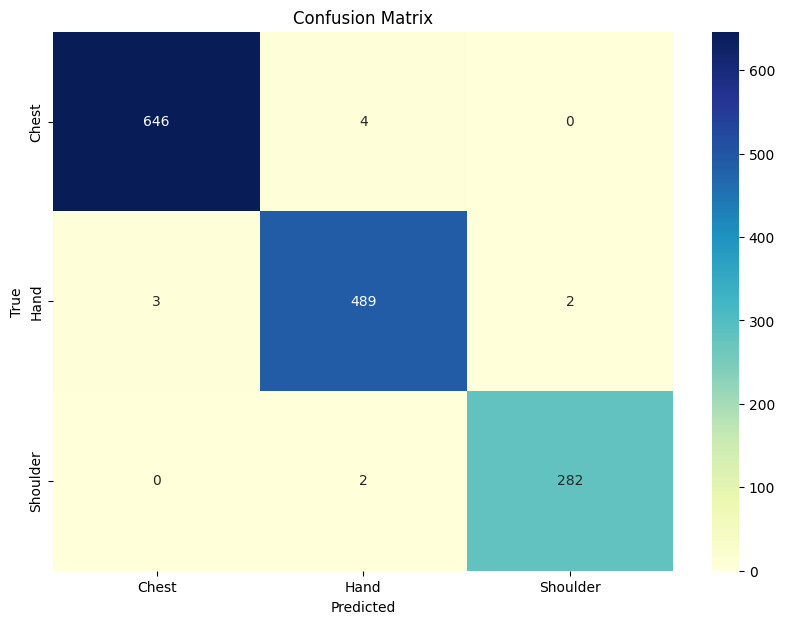

In [57]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [58]:
history = model.fit(X_train_reshaped, y_train_onehot, batch_size=32, epochs=10, validation_split=0.2)

Train on 2663 samples, validate on 666 samples
Epoch 1/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.0231 - val_accuracy: 0.9895
Epoch 2/10
2663/2663 [==============================] - 8s 3ms/sample - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0221 - val_accuracy: 0.9880
Epoch 3/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.1535 - val_accuracy: 0.9640
Epoch 4/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.0228 - val_accuracy: 0.9865
Epoch 5/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0319 - val_accuracy: 0.9895
Epoch 6/10
2663/2663 [==============================] - 9s 3ms/sample - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0271 - val_accuracy: 0.9895
Epoch 7/10
2663/2663 [==============================] - 8s 3ms/sample - loss:

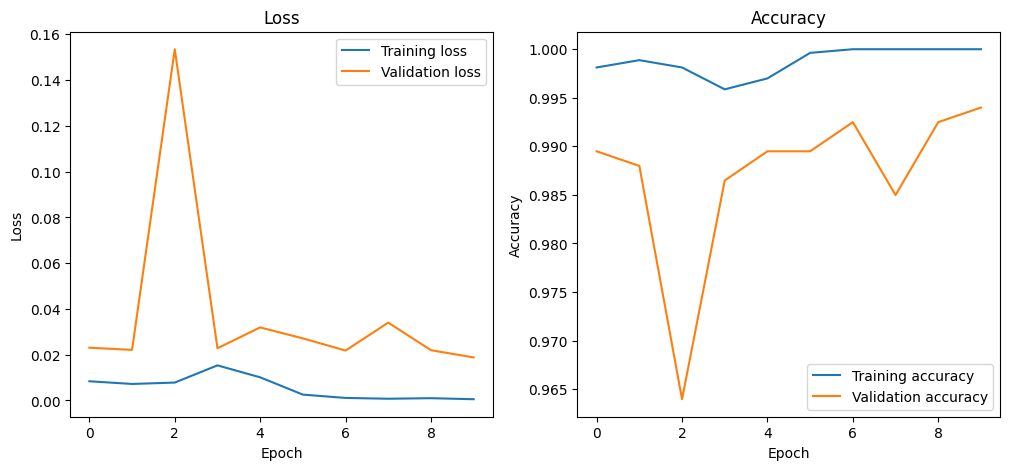

In [59]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot training and validation loss
    ax1.plot(history.history['loss'], label='Training loss')
    ax1.plot(history.history['val_loss'], label='Validation loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot training and validation accuracy
    ax2.plot(history.history['accuracy'], label='Training accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()
    
plot_training_history(history)

## Deployment